In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Análisis de tiempo de extracción por modelo de lenguaje
import seaborn as sns

In [89]:
data_path = "data/formalizacion_data.csv"

data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display columns and dimensions of the dataset
print(f"Columns are: {data.columns}")
print(f"Number of rows is: {data.shape[0]} and number of columns is: {data.shape[1]}")

# Average time of extraction by language model and in total
print(data.groupby("model")["time"].mean())
print(data["time"].mean())

                   pdf  mm_yyyy                                       company  \
0  BOE-B-2016-1036.pdf  01-2016  AEG Power Solutions Ibérica Sociedad Anónima   
1  BOE-B-2016-2351.pdf  01-2016  LD Empresa de Limpieza y Desinfección S.A.U.   
2  BOE-B-2016-2508.pdf  01-2016                             Oms Sacede S.A.U.   
3   BOE-B-2016-859.pdf  01-2016                         Oracle Ibérica S.R.L.   
4  BOE-B-2016-1560.pdf  01-2016                                     U90236837   

       amount currency                                       adjudicadora  \
0   302000.00    euros          Dirección de Abastecimiento y Transportes   
1   492471.06    euros            Departamento de Economía y Conocimiento   
2  6369651.20    euros                          Agencia Catalana del Agua   
3   217338.97    euros  Junta de Contratación de la Subsecretaría de F...   
4  1452077.10    euros          Instituto Nacional de la Seguridad Social   

         tipo tramitacion             procedimient

Avarage time of data extraction is 325 seconds aprox so 300 files would take 27 hours aprox.

In [65]:
import json
# Group pdfs by mm_yyyy
grouped_data = data.groupby("mm_yyyy").size().reset_index(name='counts')
print(grouped_data)

# Read data/mm_yyyy_size.json
with open("data/mm_yyyy_size.json") as f:
    size_data = json.load(f)
print(size_data)

# Create a new column in grouped_data with the size of the pdfs
grouped_data["size"] = grouped_data["mm_yyyy"].map(size_data)
print(grouped_data)
sum(grouped_data["size"])
sum(grouped_data["counts"])
print(f"Total size of pdfs is: {sum(grouped_data['size'])} and total number of pdfs is: {sum(grouped_data['counts'])}")

    mm_yyyy  counts
0   01-2016       9
1   01-2017      11
2   02-2016       9
3   02-2017      11
4   03-2016       6
5   03-2017      10
6   04-2016       9
7   04-2017       7
8   05-2016       6
9   05-2017       8
10  06-2016       7
11  06-2017       9
12  07-2016       7
13  07-2017       9
14  08-2016       6
15  09-2016       9
16  10-2016       9
17  11-2016       9
18  12-2016       9
{'01-2016': 9, '02-2016': 9, '03-2016': 6, '04-2016': 9, '05-2016': 6, '06-2016': 7, '07-2016': 7, '08-2016': 6, '09-2016': 9, '10-2016': 9, '11-2016': 9, '12-2016': 9, '01-2017': 11, '02-2017': 11, '03-2017': 10, '04-2017': 7, '05-2017': 8, '06-2017': 9, '07-2017': 10, '08-2017': 6, '09-2017': 10, '10-2017': 12, '11-2017': 11, '12-2017': 10, '01-2018': 12, '02-2018': 11, '03-2018': 7, '04-2018': 9, '05-2018': 7, '06-2018': 10, '07-2018': 9, '08-2018': 4, '09-2018': 7, '10-2018': 5, '11-2018': 3, '12-2018': 1, '01-2019': 2, '02-2019': 1, '03-2019': 1, '04-2019': 1, '05-2019': 0, '06-2019': 0, 

# Descriptive analysis

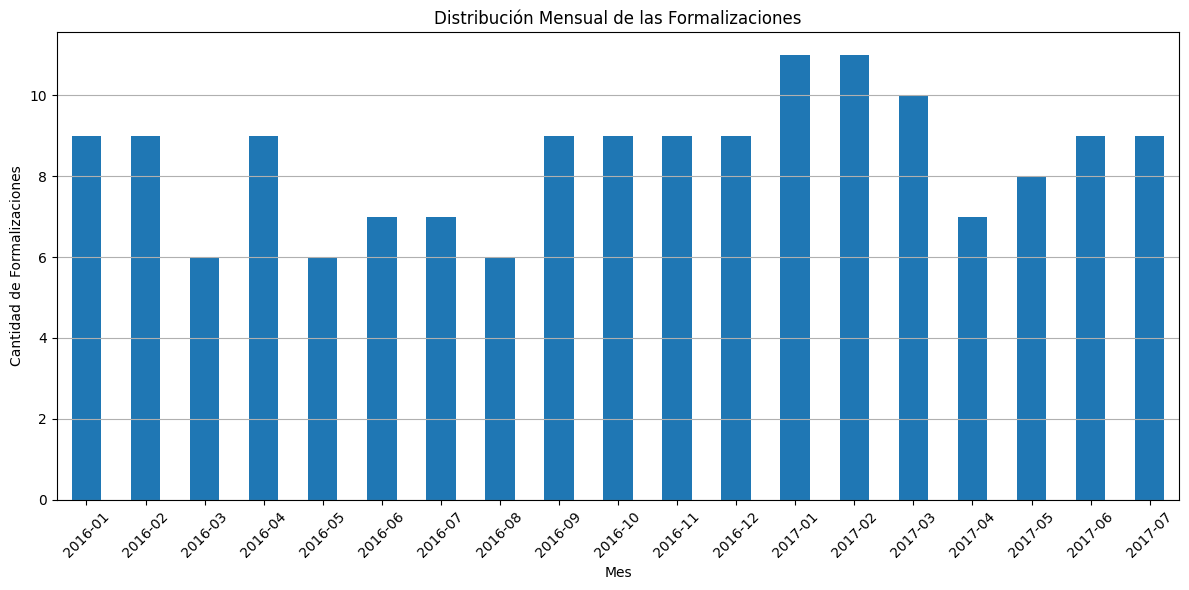

In [66]:
# Convertir la columna 'mm_yyyy' a tipo datetime
data['mm_yyyy'] = pd.to_datetime(data['mm_yyyy'], format='%m-%Y')

# Contar la cantidad de formalizaciones por mes
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Graficar la distribución mensual
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Distribución Mensual de las Formalizaciones')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Formalizaciones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

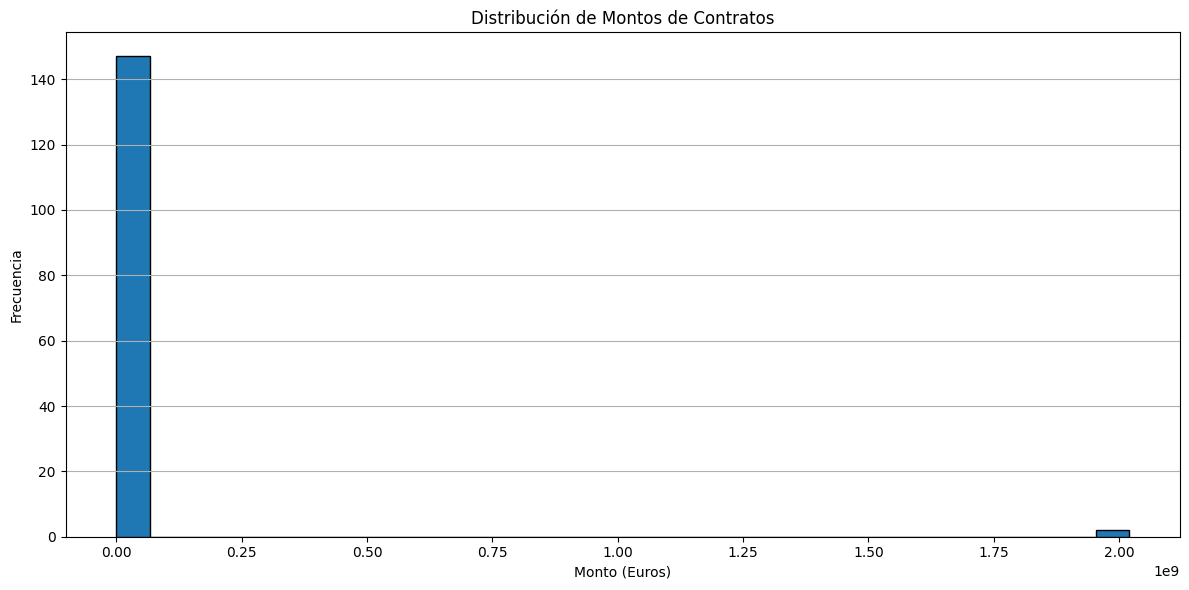

In [67]:
# Análisis 2: Distribución de Montos de Contratos
# Convertir los montos a formato numérico (asegurando que están en euros)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Descripción estadística de los montos
amount_stats = data['amount'].describe()

# Graficar la distribución de montos
plt.figure(figsize=(12, 6))
plt.hist(data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

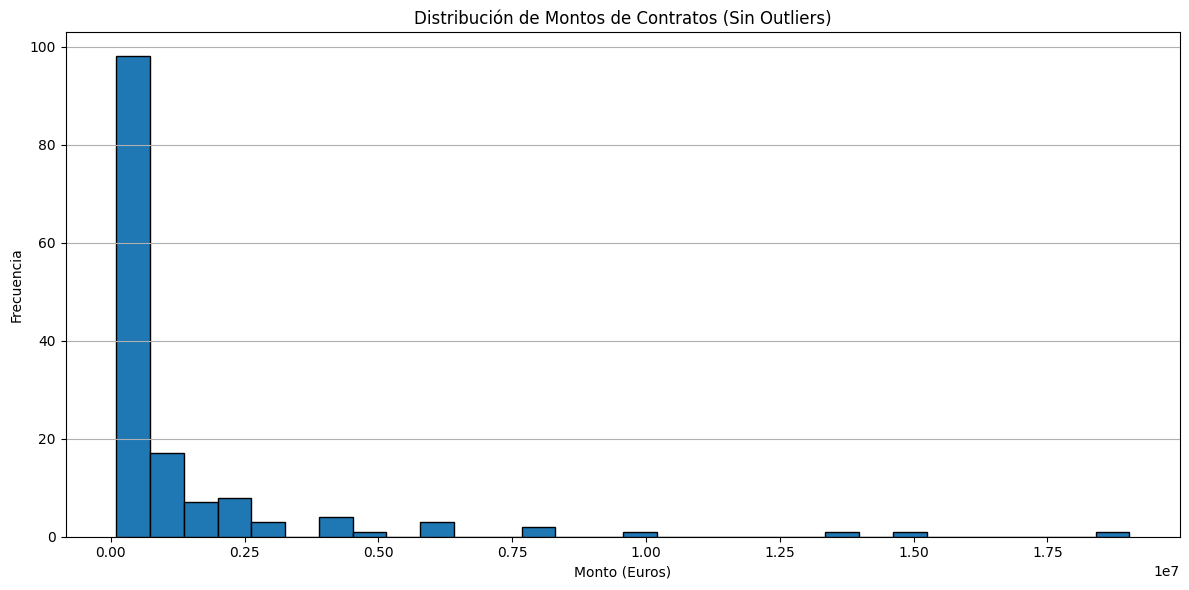

In [68]:
# Calcular el percentil 99 para identificar el outlier
percentile_99 = np.percentile(data['amount'].dropna(), 99)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_data = data[data['amount'] <= percentile_99]

# Crear una nueva gráfica sin los outliers
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos (Sin Outliers)')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Concentración de Montos:
    - La mayoría de los contratos se encuentran en el rango de 0 a 200,000 euros. Esto indica que la mayoría de las formalizaciones son de bajo a mediano valor.
  
2. Disminución Rápida:
    - Hay una disminución rápida en la frecuencia de contratos a medida que aumentan los montos. Los contratos con valores superiores a 1 millón de euros son significativamente menos frecuentes.

3. Distribución Asimétrica:
    - La distribución es asimétrica, con una cola a la derecha que sugiere la presencia de algunos contratos de mayor valor que son menos frecuentes pero impactan la media de los montos.

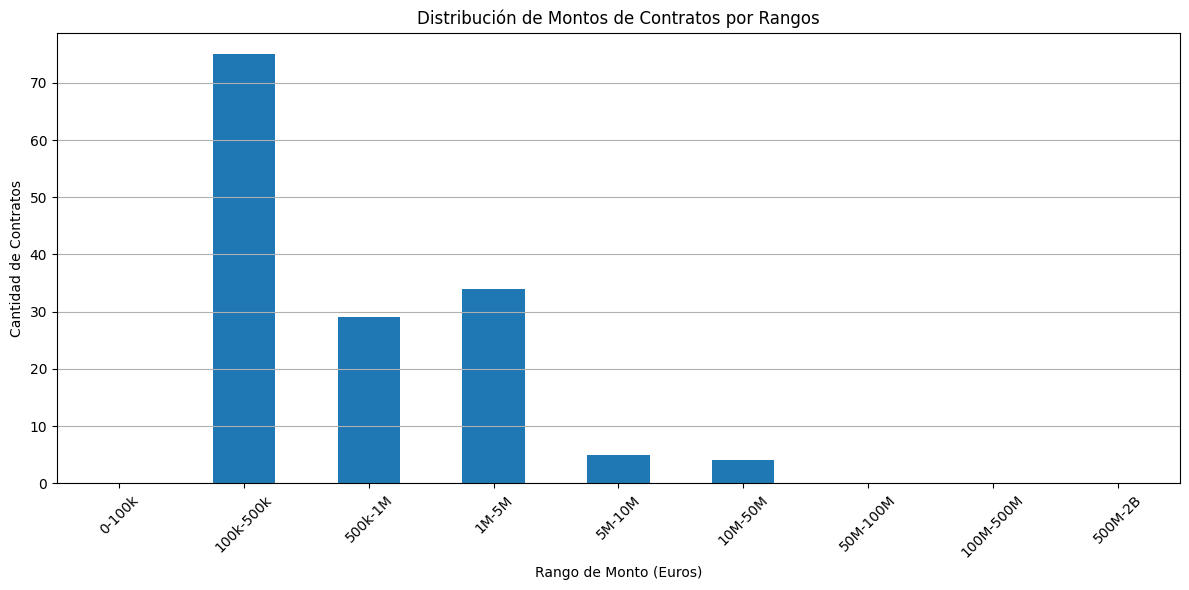

In [69]:
# Agrupar en rangos y graficar
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 2000000000]
labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-2B']
data['amount_range'] = pd.cut(data['amount'], bins=bins, labels=labels, include_lowest=True)

amount_range_counts = data['amount_range'].value_counts().sort_index()

# Graficar la distribución por rangos de montos
plt.figure(figsize=(12, 6))
amount_range_counts.plot(kind='bar')
plt.title('Distribución de Montos de Contratos por Rangos')
plt.xlabel('Rango de Monto (Euros)')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Rangos Dominantes:
    - El rango de 100,000 a 500,000 euros es el más frecuente, seguido por el rango de 500,000 a 1 millón de euros. Esto sugiere que la mayoría de los contratos se sitúan en un rango de valor moderado.
2. Poca Representación en Rangos Altos:
    - Hay muy pocos contratos en los rangos superiores a 10 millones de euros. Esto refuerza la observación de que la mayoría de las formalizaciones son de menor escala.
3. Representación Proporcional:
    - La gráfica muestra una caída progresiva en la frecuencia de contratos a medida que los montos aumentan, lo que indica una distribución que sigue una tendencia natural donde los grandes contratos son menos comunes.

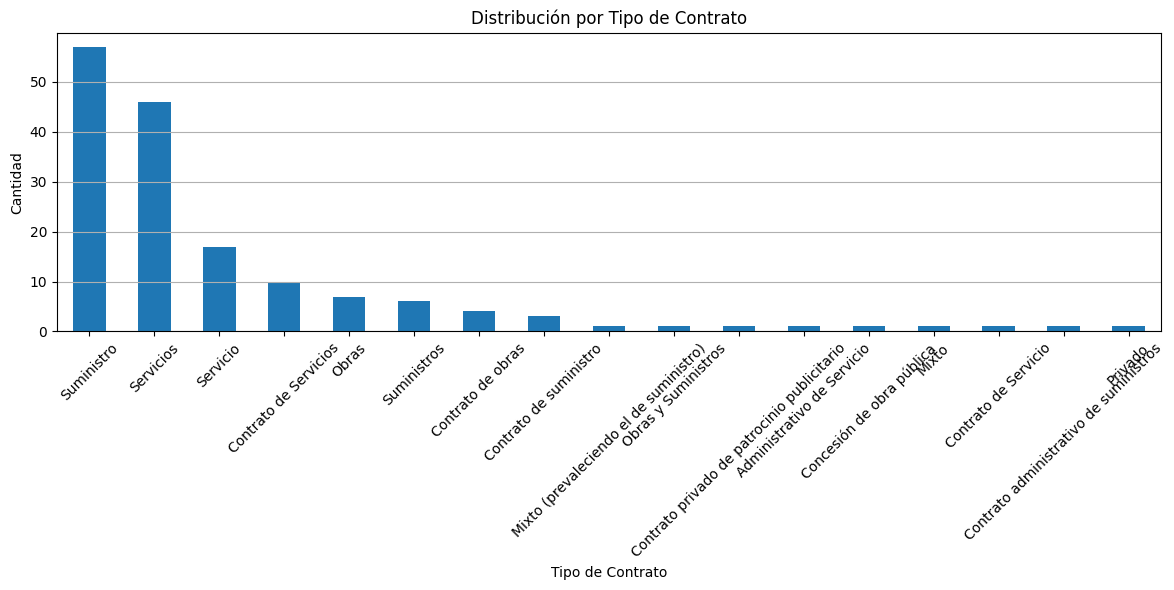

In [70]:
# Análisis 3: Análisis por Tipo de Contrato
# Contar la cantidad de cada tipo de contrato
tipo_counts = data['tipo'].value_counts()

# Graficar la distribución por tipo de contrato
plt.figure(figsize=(12, 6))
tipo_counts.plot(kind='bar')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_10895/2785069847.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


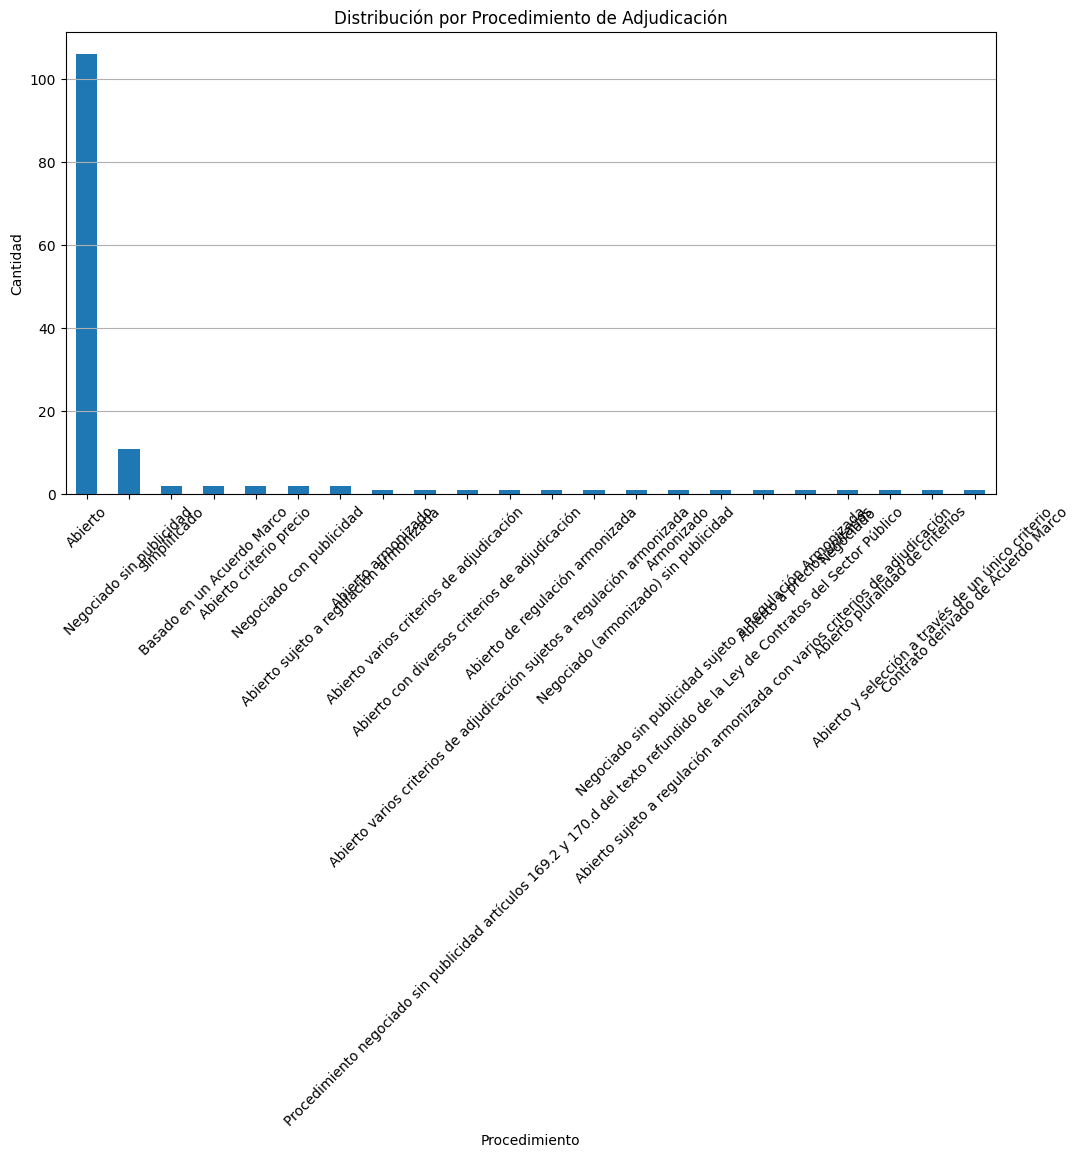

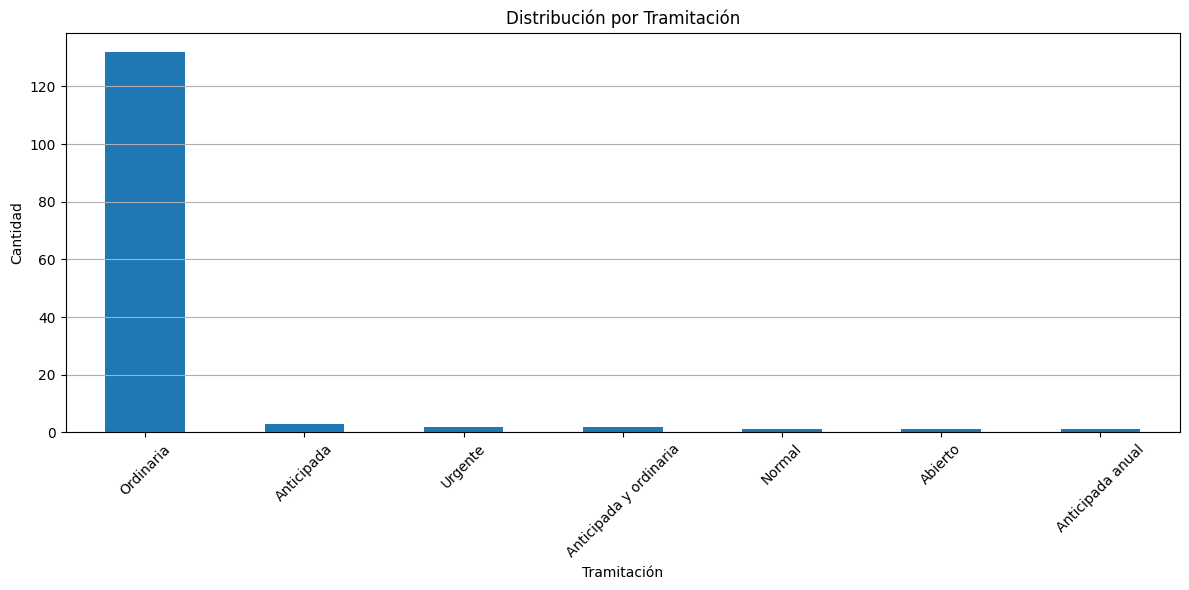

In [71]:
# Análisis 4: Procedimientos y Tramitación
# Contar la cantidad de cada procedimiento
procedimiento_counts = data['procedimiento'].value_counts()
tramitacion_counts = data['tramitacion'].value_counts()

# Graficar la distribución por procedimiento
plt.figure(figsize=(12, 6))
procedimiento_counts.plot(kind='bar')
plt.title('Distribución por Procedimiento de Adjudicación')
plt.xlabel('Procedimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Graficar la distribución por tramitación
plt.figure(figsize=(12, 6))
tramitacion_counts.plot(kind='bar')
plt.title('Distribución por Tramitación')
plt.xlabel('Tramitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

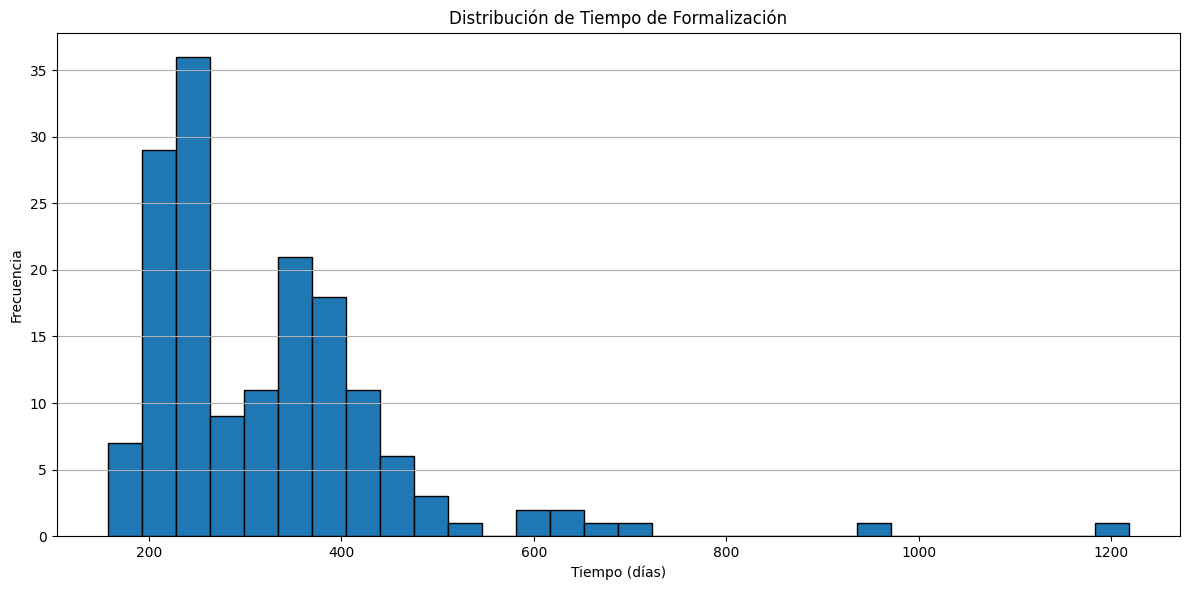

In [72]:
# Análisis 5: Tiempo de Formalización
# Descripción estadística del tiempo de formalización
data['time'] = pd.to_numeric(data['time'], errors='coerce')
time_stats = data['time'].describe()

# Graficar la distribución de tiempo de formalización
plt.figure(figsize=(12, 6))
plt.hist(data['time'], bins=30, edgecolor='black')
plt.title('Distribución de Tiempo de Formalización')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [73]:
# Mostrar estadísticas resumen
amount_stats, time_stats

(count    1.490000e+02
 mean     2.848906e+07
 std      2.331013e+08
 min      1.010824e+05
 25%      2.822234e+05
 50%      4.924711e+05
 75%      1.243265e+06
 max      2.020526e+09
 Name: amount, dtype: float64,
 count     160.000000
 mean      325.117562
 std       138.738558
 min       157.450000
 25%       230.690000
 50%       297.775000
 75%       385.645000
 max      1218.230000
 Name: time, dtype: float64)

# Temporal Analysis

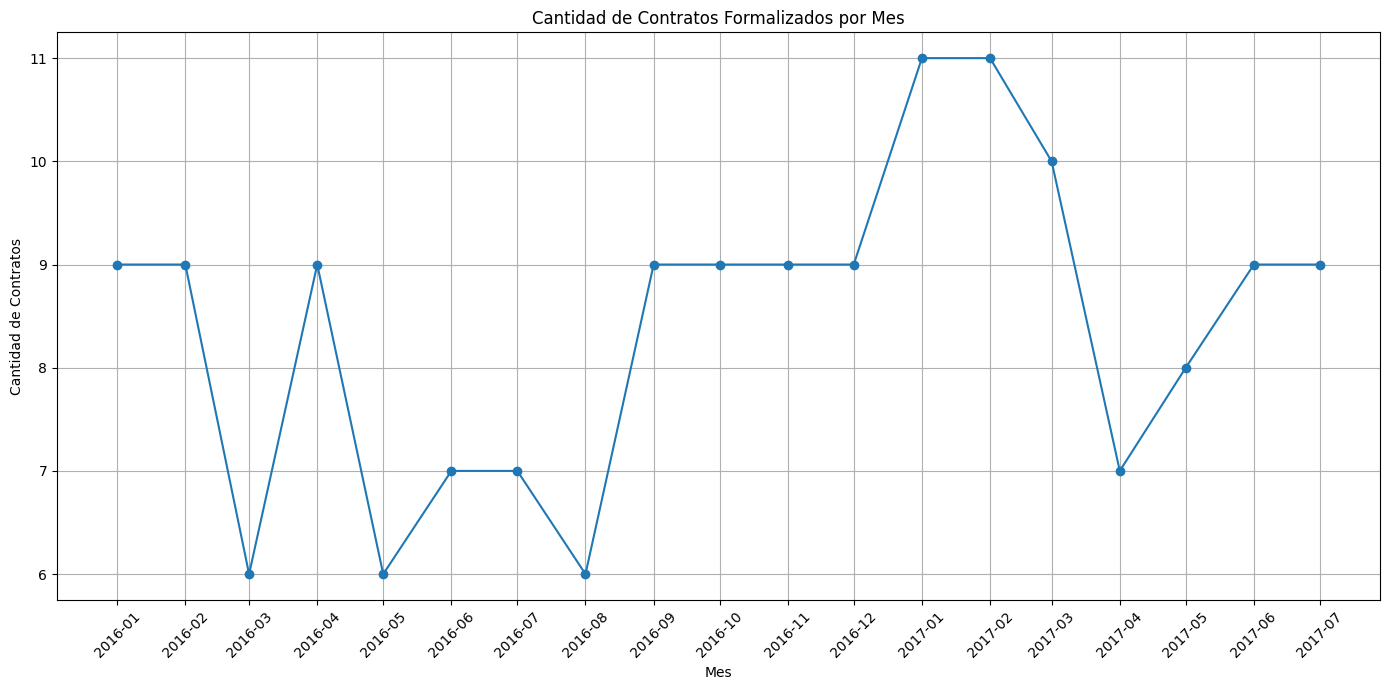

In [74]:
# Análisis temporal de la cantidad de contratos
import matplotlib.dates as mdates

# Agrupar los datos por mes y contar la cantidad de contratos
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Convertir a un formato que permita graficar
monthly_counts = monthly_counts.to_timestamp()

# Graficar la cantidad de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Cantidad de Contratos Formalizados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

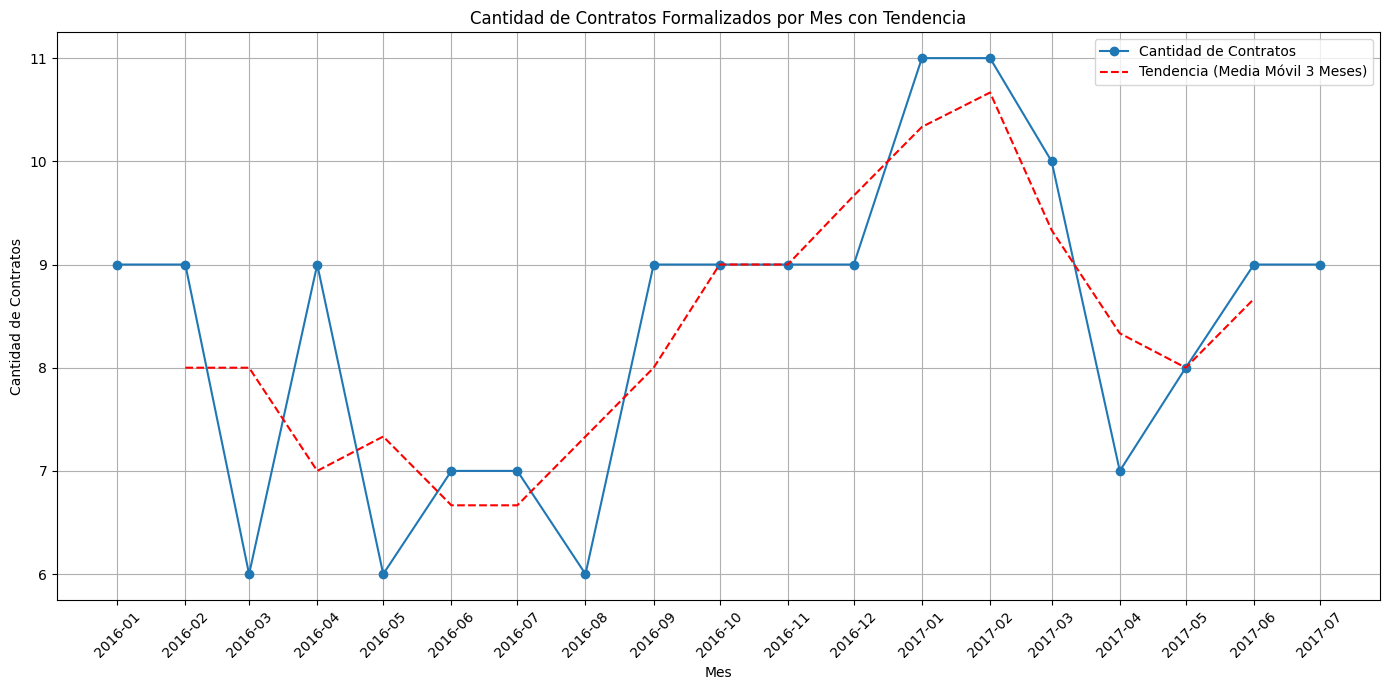

In [75]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_counts_rolling = monthly_counts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', label='Cantidad de Contratos')
plt.plot(monthly_counts_rolling.index, monthly_counts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Cantidad de Contratos Formalizados por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

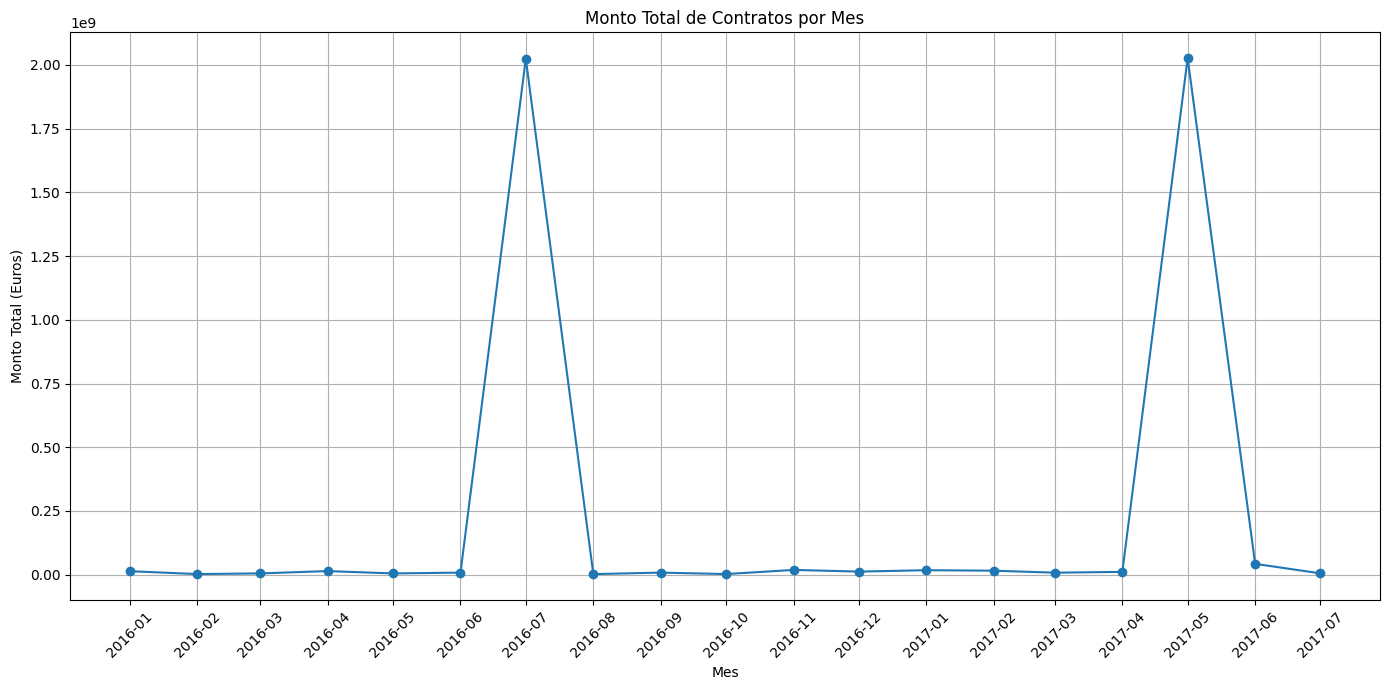

In [76]:

# Agrupar los datos por mes y sumar los montos de los contratos por mes
monthly_amounts = data.groupby(data['mm_yyyy'].dt.to_period('M'))['amount'].sum().sort_index()

# Convertir a un formato que permita graficar
monthly_amounts = monthly_amounts.to_timestamp()

# Graficar los montos de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

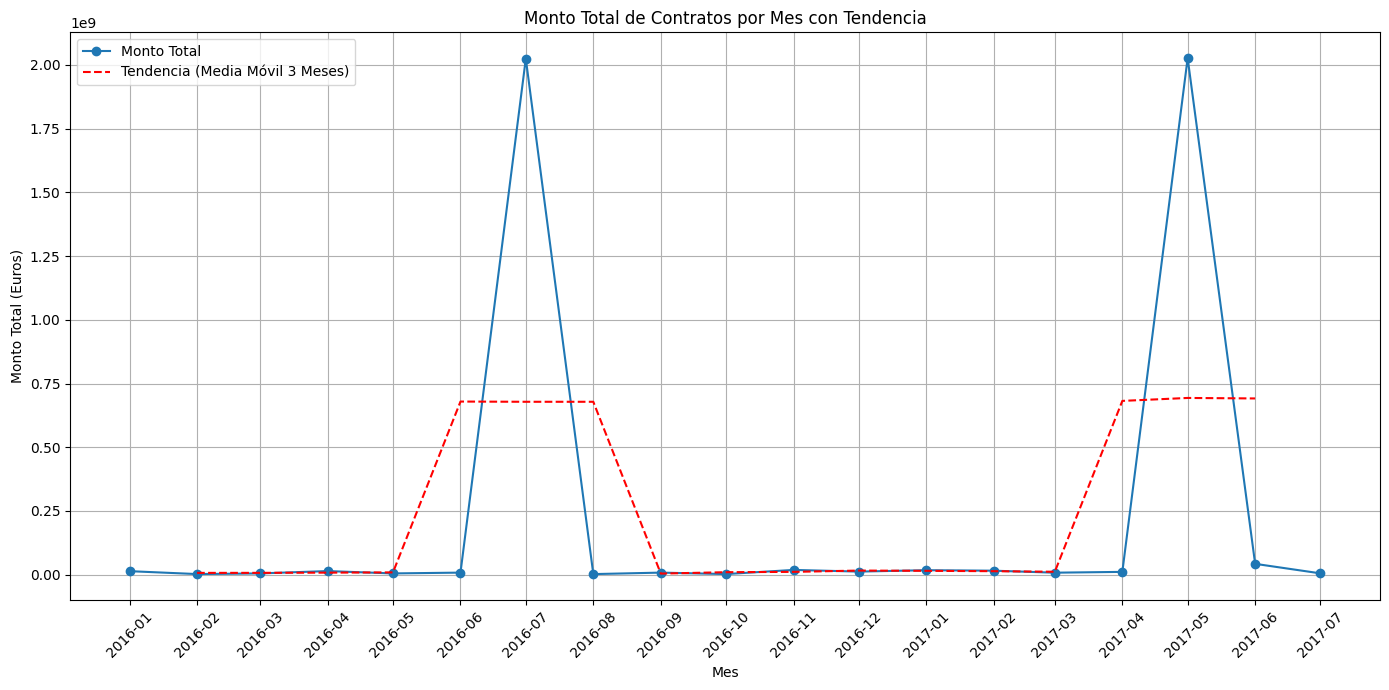

In [77]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_amounts_rolling = monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(monthly_amounts_rolling.index, monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
# Resumen estadístico de los montos de contratos por mes
monthly_amounts.describe()

count    1.900000e+01
mean     2.234142e+08
std      6.350431e+08
min      2.430864e+06
25%      5.223574e+06
50%      1.114182e+07
75%      1.675673e+07
max      2.026254e+09
Name: amount, dtype: float64

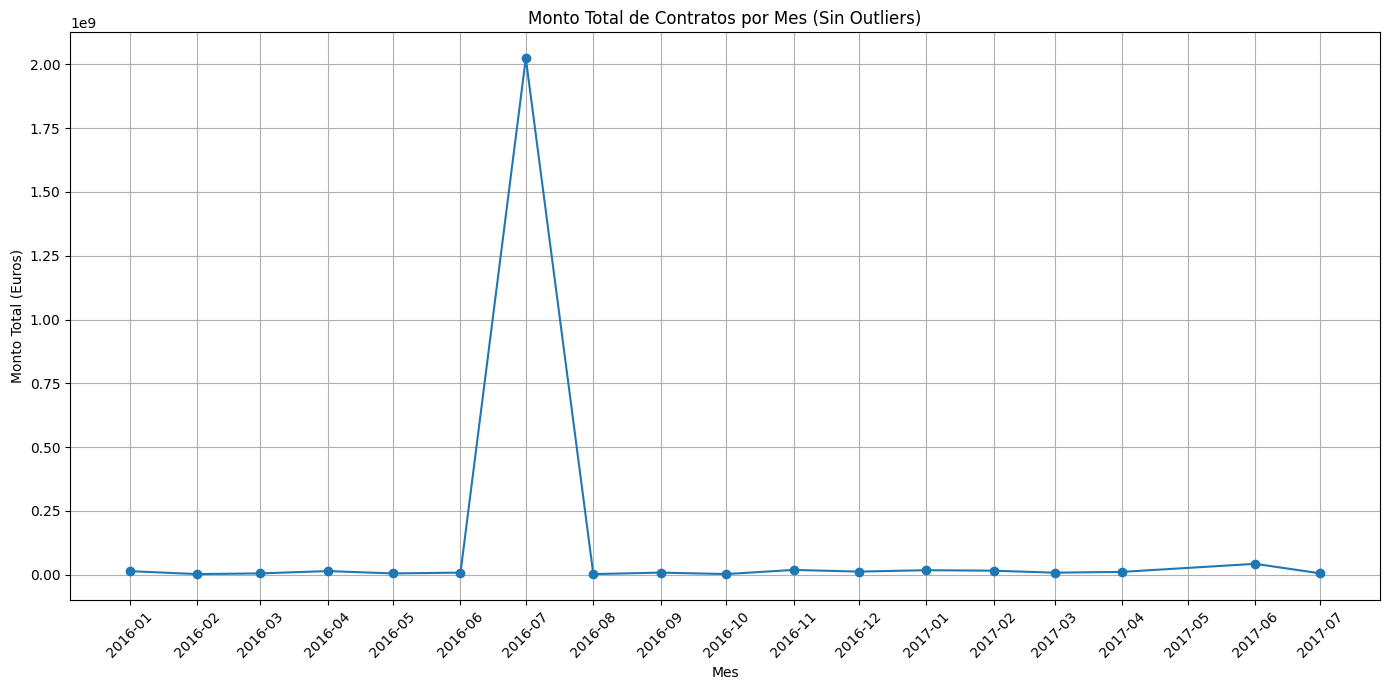

In [79]:
# Identificar y eliminar el outlier
# Calcular el percentil 99 para identificar el outlier
percentile_99_amount = np.percentile(monthly_amounts, 99)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_monthly_amounts = monthly_amounts[monthly_amounts <= percentile_99_amount]

# Graficar los montos de contratos por mes sin el outlier
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

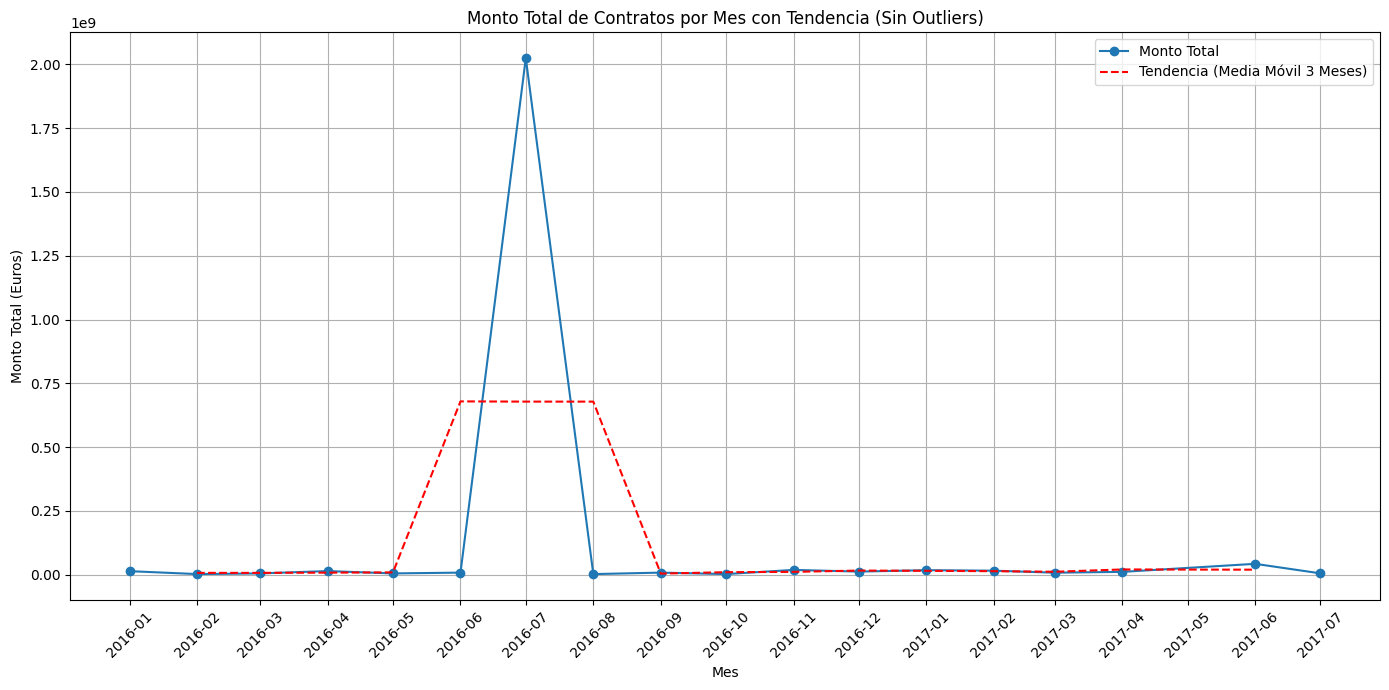

In [80]:
# Agregar una tendencia utilizando una media móvil de 3 meses
filtered_monthly_amounts_rolling = filtered_monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(filtered_monthly_amounts_rolling.index, filtered_monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
# Resumen estadístico de los montos de contratos por mes sin outlier
filtered_monthly_amounts.describe()

count    1.800000e+01
mean     1.232565e+08
std      4.745422e+08
min      2.430864e+06
25%      5.184671e+06
50%      9.708915e+06
75%      1.541833e+07
max      2.024347e+09
Name: amount, dtype: float64

# Compare llama3 and phi3

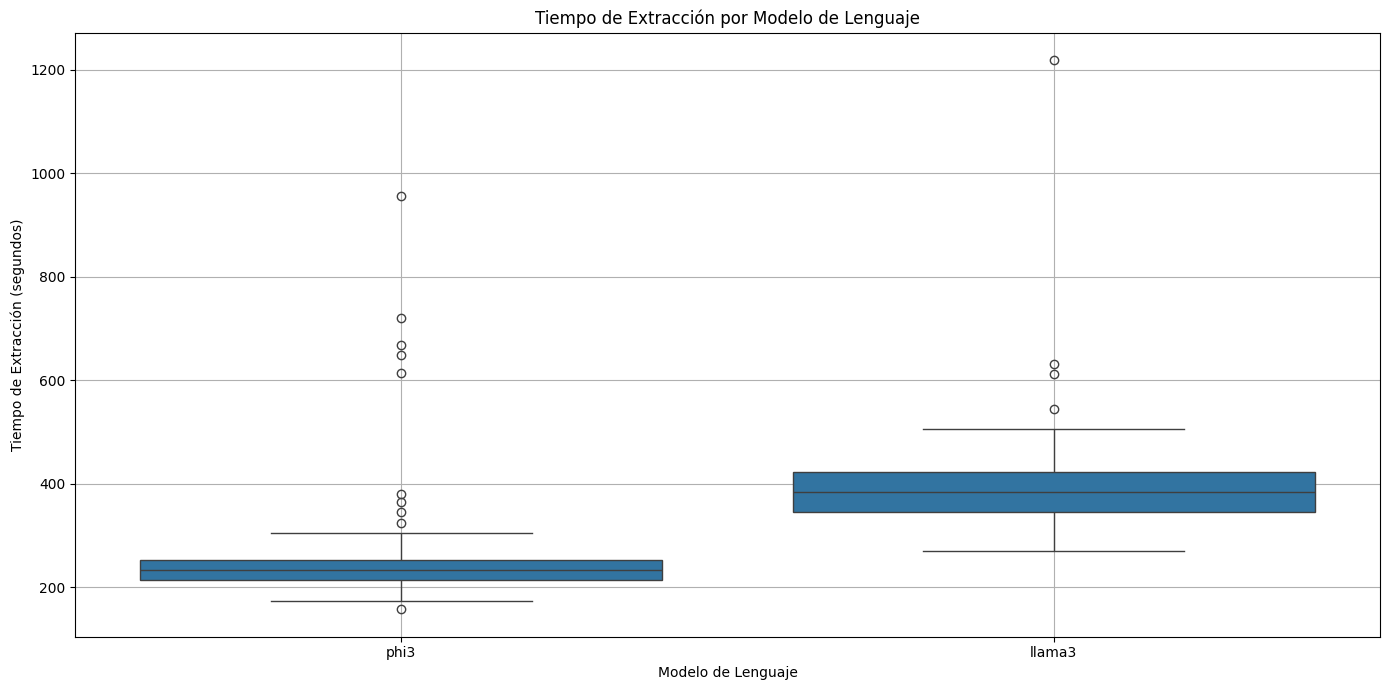

In [82]:
# Calcular la estadística descriptiva del tiempo por modelo
model_time_stats = data.groupby('model')['time'].describe()

# Graficar el tiempo promedio de extracción por modelo de lenguaje
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data)
plt.title('Tiempo de Extracción por Modelo de Lenguaje')
plt.xlabel('Modelo de Lenguaje')
plt.ylabel('Tiempo de Extracción (segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
# Mostrar las estadísticas de tiempo por modelo
model_time_stats

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
llama3,73.0,399.599041,118.214527,270.22,346.280,384.38,423.190,1218.23
phi3,87.0,262.621609,123.399073,157.45,214.325,232.55,251.895,956.01


In [84]:
from scipy.stats import shapiro, normaltest, anderson

# Prueba de Shapiro-Wilk para distribución normal
shapiro_llama3 = shapiro(data[data['model'] == 'llama3']['time'])
shapiro_phi3 = shapiro(data[data['model'] == 'phi3']['time'])

# Mostrar resultados de las pruebas
shapiro_results = {
    'llama3': {'Statistic': shapiro_llama3[0], 'p-value': shapiro_llama3[1]},
    'phi3': {'Statistic': shapiro_phi3[0], 'p-value': shapiro_phi3[1]}
}

shapiro_results

{'llama3': {'Statistic': np.float64(0.5845154695443803),
  'p-value': np.float64(4.653093458782705e-13)},
 'phi3': {'Statistic': np.float64(0.5083941187822105),
  'p-value': np.float64(1.413995287187981e-15)}}

No siguen una normal ninguno de los dos

In [85]:
from scipy.stats import ks_2samp

# Realizar la prueba de Kolmogorov-Smirnov para comparar las distribuciones de tiempo entre los dos modelos
ks_test_result = ks_2samp(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Mostrar resultados de la prueba
ks_test_result

KstestResult(statistic=np.float64(0.8620689655172413), pvalue=np.float64(5.394780933726725e-31), statistic_location=np.float64(270.12), statistic_sign=np.int8(-1))

pvalor p-valor: 1.0006e-26 La prueba de Kolmogorov-Smirnov sugiere que los tiempos de extracción para los modelos llama3 y phi3 no siguen la misma distribución.

In [86]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Wilcoxon-Mann-Whitney para comparar las medianas de los tiempos de extracción entre los dos modelos
wilcoxon_result = mannwhitneyu(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'], alternative='two-sided')

# Mostrar resultados de la prueba
wilcoxon_result

MannwhitneyuResult(statistic=np.float64(5889.0), pvalue=np.float64(1.4848425161293293e-20))

p-valor: 6.4513e-18 La prueba de Wilcoxon-Mann-Whitney sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [87]:
from scipy.stats import kruskal

# Realizar la prueba de Kruskal-Wallis para comparar las medianas de los tiempos de extracción entre los dos modelos
kruskal_result = kruskal(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Mostrar resultados de la prueba
kruskal_result

KruskalResult(statistic=np.float64(86.41177160930306), pvalue=np.float64(1.4611260040023778e-20))

La prueba de Kruskal-Wallis sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes